<h1 style="text-align:center;">Capítulo 3 - Sustancia pura</h1>
<div style="text-align:center;">
En el curso, solo se trabajaran sustancias que en su composición se asume 100% puro, no se tendrán en cuenta procesos de mezclas.
</div>

Referencias : 

- Tablas de propiedades del libro de Cengel
- Tablas de propiedades del libro de Kenneth wark


# Diagramas de estado

Se tomara agua para realizar análisis como ejemplo, en sus estados de sólido, líquido y vapor (gas). 

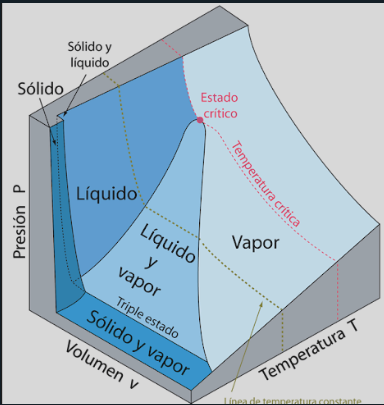

## Diferencia entre gas y vapor : 

- Vapor : Se llama vapor a la fase gaseosa de una sustancia cuando, a la temperatura considerada, esa sustancia puede existir también como líquido o sólido, y por tanto la fase gaseosa puede condensarse solo aumentando la presión (compresión isotérmica) hasta alcanzar la presión de saturación. Esto se conecta con el concepto de presión de vapor de saturación: es la presión ejercida por una sustancia pura en un sistema donde coexisten únicamente su vapor y su fase condensada (líquida o sólida).

- Gas : Se llama gas a la fase gaseosa cuando, a la temperatura considerada, no puede licuarse únicamente aplicando presión: primero debe enfriarse por debajo de su temperatura crítica. La temperatura crítica se define como la temperatura por encima de la cual no es posible licuar el gas.

## Diagrama P,T : 

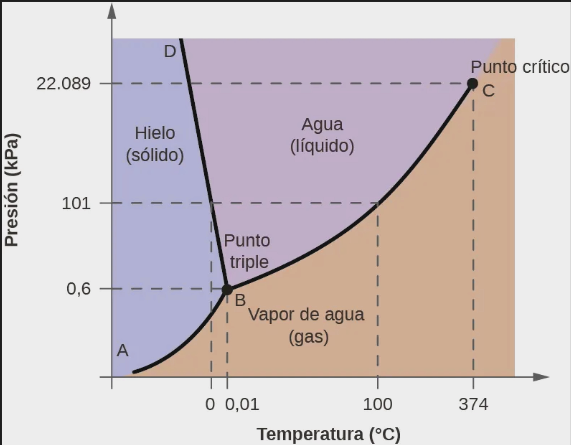

### Terminología : 
- linea de fusión : 
- linea de condensación : 
- linea de congelación : 
- linea de sublimación : 
- linea de vaporización : 

## Diagrama P,v : 

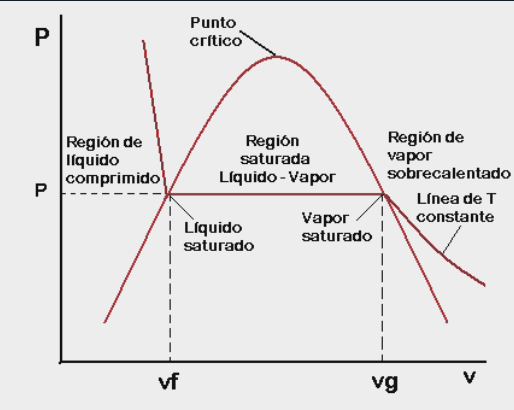

### Terminología : 
- estado de saturación :
- calor latente :
- calor sensible :
- vapor saturado :
- liquido saturado :
- vapor sobrecalentado :
- liquido subenfriado :

## Diagrama T,v : 

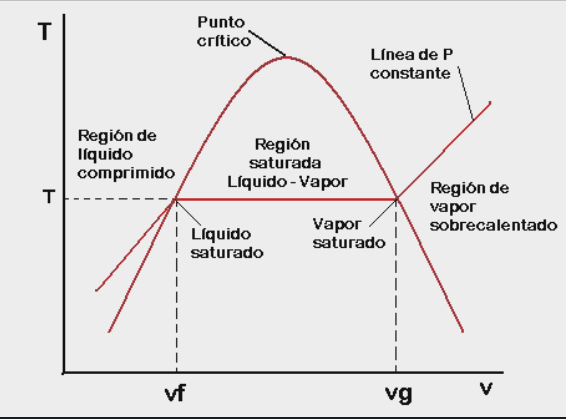

### Terminología : 
- calidad :
- presión crítica :
- temperatura crítica :
- linea isoterma :
- linea isobara :

# Para estado de gas/vapor : 

W_compresión/expansión :

$$
W_{\text{expansion}} = -\int_{v_i}^{v_f} P\,\mathrm{d}v
$$

# Cálculo de propiedades en estdo de saturación

$$
m_{\text{total}} = m_{\text{vap}} +m_{\text{liq}}
$$

$$
x = \frac{m_{\text{vap}}}{m_{\text{total}}}
$$

- Sea $a$ un propiedad cualquiera (entalpía, entropía, volumen específico, energía interna)
- $f$ es el estado de liquido saturado
- $g$ es el estado de vapor saturado
- $x$ es calidad 

$$
a_{{\text{x}}} = a_{{\text{f}}} + x (a_{{\text{g}}}-a_{{\text{f}}})
$$

## Recomendaciones :

Para verificar los estados de saturación, siempre revisar primero las tablas de saturación de presión, usar las de temperatura para verificación

# Interpolación

Normalmente cuando se refieren a interpolación, hacen referencia a la regresión lineal (función lineal):

$$
y = f(x) = mx + b
$$

- $m$ = pendiente de la curva, se calcula entre punto final e inicial conocidos ($\frac{y_{{\text{f}}}-y_{{\text{i}}}}{x_{{\text{i}}}-x_{{\text{f}}}}$)
- $b$ = intercepto con el eje $y$

pero en interpolación , normalmente en el cambio de el eje x no esta desde el origen, sino desde un punto conocido diferente al 0, por tante $x$ cambia a $\Delta x$ 

## Para calculo de propiedades en puntos intermedios:

$$
Y_{\text{objetivo}} = \frac{Y_{\text{final}} - Y_{\text{inicial}}}{X_{\text{final}} - X_{\text{inicial}}} * ({X_{\text{objetivo}} - X_{\text{inicial}}}) + Y_{\text{inicial}}
$$

- $Y$ es el valor de propiedad que se desea encontrar
- $X$ es el valor de propiedad conocida en el cual se desean buscar las demas propiedades para este valor de X

In [ ]:
#   Funciones para procesos de calidad

def calculo_calidad(valor_propiedad_actual : float, propiedad_estado_f : float, propiedad_estado_g : float) -> float :
    propiedad_gf = propiedad_estado_g - propiedad_estado_f
    x_calidad = (valor_propiedad_actual-propiedad_estado_f) / propiedad_gf
    return x_calidad

def valor_propiedad_saturacion(x_calidad : float, propiedad_estado_f : float, propiedad_estado_g : float):
    valor_propiedad_x = propiedad_estado_f + x_calidad * (propiedad_estado_g-propiedad_estado_f)
    return valor_propiedad_x

In [1]:
#   Funciones para interpolación

def resultado_interpolacion(x_busqueda, x_inicial, y_inicial, x_final, y_final) :
    m = (y_final-y_inicial)/(x_final-x_inicial)
    resultado = m*(x_busqueda-x_inicial) + y_inicial
    return resultado

## Tablas de saturación de agua (Yugus Cengel)

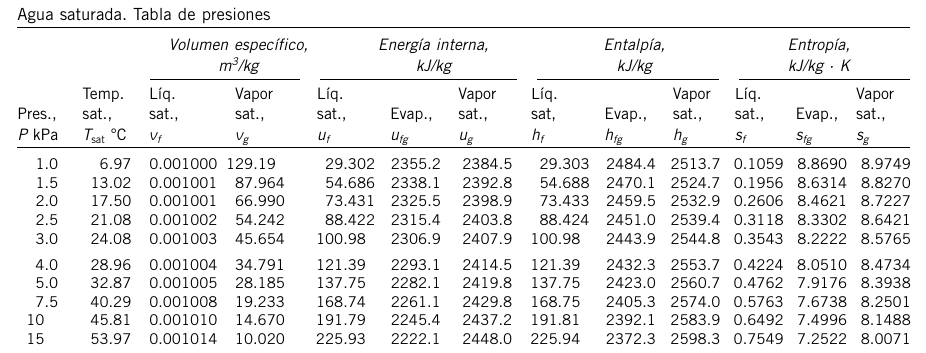

#### Para la presión de saturación de 4.0kPa , se somete una masa total de 45kg de agua, en la que se registra una masa vapor de 12kg, calcular que valor de entropía y volumen especifico se presenta en este estado.

#### Para la presión de saturación de 7.5kPa , se mide una entalpía de 2000,0 kJ/kg con una masa de vapor inicial ingresado de 120kg. Determinar cuanta masa de líquido hay en este estado y la energía interna.

In [5]:
s_g = 8.4734
s_f = 8.0510
vesp_g = 34.791 
vesp_f = 0.001004

mtotal = 45
mvapor = 12

x = mvapor/mtotal

s_x = valor_propiedad_saturacion(x, s_f, s_g)
vesp_x = valor_propiedad_saturacion(x, vesp_f, vesp_g)

print(f"a calidad x = {x:,.3f}, el valor de entropia y volumen específico son respectivamente")
print(f"{vesp_x:,.3f} m³/kg, {s_x:,.3f}kJ/kg.K")

a calidad x = 0.267, el valor de entropia y volumen específico son respectivamente
9.278 m³/kg, 8.164kJ/kg.K


In [9]:
h_g = 2574
h_f = 168.75

h_x = 2000
mtotal = 120

x = calculo_calidad(h_x, h_f, h_g)

print(f"Calidad para este estado : {x:,.3f}")

#   x = mvapor / mtotal
#   x = (mtotal-mliquido) / mtotal
#   xmtotal = mtotal-mliquido
#   mliquido = mtotal - xmtotal
mliquido = mtotal * (1-x)

print(f"la masa de liquido es {mliquido:,.3f} kg")

u_g = 2429.8
u_f = 168.74

u_x = valor_propiedad_saturacion(x, u_f, u_g)
print(f"la energia interna para x = {x:,.3f} es igual a {u_x:,.3f} kJ/kg")

Calidad para este estado : 0.761
la masa de liquido es 28.637 kg
la energia interna para x = 0.761 es igual a 1,890.210 kJ/kg


## Tablas de vapor de agua sobrbecalentado (Yugus Cengel)

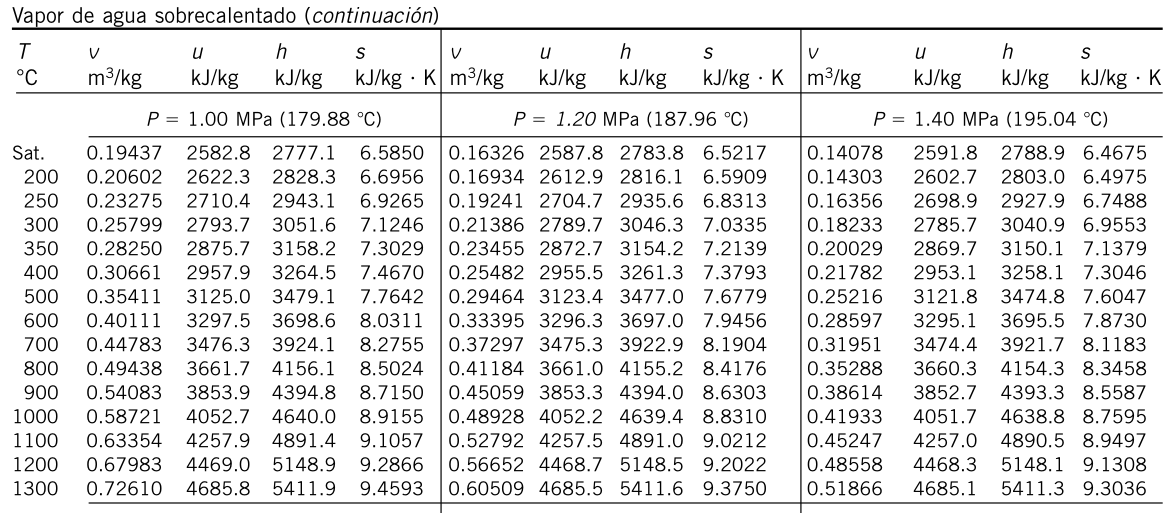

#### Calcular la entapía y volumen específico para un sistema que esta a 550°C y 1.4 MPa
#### Calcular la energía interna y entropía para un sistema que esta a 780°C y 1.12 MPa

In [ ]:
# 550 esta entre 500 y 600 °C
# Para 1.4 MPa
h_T500 = 3474.8
h_T600 = 3695.5
vesp_T500 = 0.25216
vesp_T600 = 0.28597

T500 = 500
T_objetivo = 550
T600 = 600

vesp_T550 = resultado_interpolacion(T_objetivo, T500, vesp_T500, T600, vesp_T600)
h_T550 = resultado_interpolacion(T_objetivo, T500, h_T500, T600, h_T600)

print(f"Los valores de entalpía y volumen específico a una temperatura de {T_objetivo} son respectivamente : ")
print(f"{h_T550:,.2f} kJ/kg y {vesp_T550:,.5f} m³/kg ")

Los valores de entalpía y volumen específico a una temperatura de 550 son respectivamente : 
3,585.15 kJ/kg y 0.26906 m³/kg 


In [ ]:
# 780 esta entre 700 y 800 °C
# 1.12 esta entre 1.00 y 1.20 MPa
u_P100_T700 = 3476.3
u_P100_T800 = 3661.7
s_P100_T700 = 8.2755
s_P100_T800 = 8.5024

u_P120_T700 = 3475.3
u_P120_T800 = 3661.0
s_P120_T700 = 8.1904
s_P120_T800 = 8.4176

T700 = 700
T_objetivo = 780
T800 = 800

P100 = 1.00
P_objetivo = 1.12
P120 = 1.20

u_P100_T780 = resultado_interpolacion(T_objetivo, T700, u_P100_T700, T800, u_P100_T800)
s_P100_T780 = resultado_interpolacion(T_objetivo, T700, s_P100_T700, T800, s_P100_T800)

u_P120_T780 = resultado_interpolacion(T_objetivo, T700, u_P120_T700, T800, u_P120_T800)
s_P120_T780 = resultado_interpolacion(T_objetivo, T700, s_P120_T700, T800, s_P120_T800)

u_P112_T780 = resultado_interpolacion(P_objetivo, P100, u_P100_T780, P120, u_P120_T780)
s_P112_T780 = resultado_interpolacion(P_objetivo, P100, s_P100_T780, P120, s_P120_T780)

print(f"Para condiciones de {P_objetivo} y {T_objetivo} la energía interna y entropía son respectivamente:")
print(f"{u_P120_T780:,.3f} kJ/kg ; {s_P120_T780:,.3f} kJ/kg.k")

Para condiciones de 1.12 y 780 la energía interna y entropía son respectivamente:
3,623.860 kJ/kg ; 8.372 kJ/kg.k
